<a href="https://colab.research.google.com/github/Lufec/ML_Pima_Indians/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes - SVM


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import os
import seaborn as sns
plt.style.use('fivethirtyeight')  
import warnings

In [ ]:
dfTreino = pd.read_csv("/content/dfTreino20.csv")
dfTeste = pd.read_csv("/content/dfTeste20.csv")
print(dfTreino['Diagnóstico'].value_counts())
print(dfTeste['Diagnóstico'].value_counts())

2    400
1    400
Name: Diagnóstico, dtype: int64
2    100
1    100
Name: Diagnóstico, dtype: int64


In [ ]:
x_train = dfTreino.drop(columns = "Diagnóstico")
y_train = dfTreino['Diagnóstico']
x_test =  dfTeste.drop(columns = "Diagnóstico")
y_test =  dfTeste['Diagnóstico']

### SVM kernel Linear

Para aplicar o SVM em dados de Íris, os parâmetros foram modificados e testados manualmente. Nesta aplicação do PIMA, será usada uma função que, dado um conjunto de parâmetros e possíveis valores, ela retornará os valores de parâmetros que obtiveram os melhores resultados de acurácia. O lado positivo é que irá entregar o melhor resultado dado a lista de valores passados. Já o lado negativo é o tempo computacional relativamente maior, principalmente nos casos de Kernel Sigmoidal e Polinomial que recebem um maior número de argumentos. 

In [ ]:
parameters = {'kernel':['linear'], 'C':[1,2,3,4,5,6,7,8],
             'cache_size':[2048],'tol':[0.001,0.01,0.1,1,10]}

svc = svm.SVC()
svmL = GridSearchCV(svc, parameters)
svmL.fit(x_train,y_train)
svmL.best_params_

{'C': 4, 'cache_size': 2048, 'kernel': 'linear', 'tol': 1}

In [ ]:
print("Treino\n")
predictions = svmL.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))
print("\nTeste\n")
predictions = svmL.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Treino

[[331  69]
 [ 93 307]]
              precision    recall  f1-score   support

           1       0.78      0.83      0.80       400
           2       0.82      0.77      0.79       400

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800


Teste

[[79 21]
 [18 82]]
              precision    recall  f1-score   support

           1       0.81      0.79      0.80       100
           2       0.80      0.82      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



### SVM kernel RBF

In [ ]:
parameters = {'kernel':['rbf'], 'C':[1,2,3,4,5,6,7,8],
              'gamma':('scale','auto'), 
             'cache_size':[2048],'tol':[0.001,0.01,0.1,1,10]}

svc = svm.SVC()
svmRBF = GridSearchCV(svc, parameters)
svmRBF.fit(x_train,y_train.values.ravel())
svmRBF.best_params_

{'C': 3, 'cache_size': 2048, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 1}

In [ ]:
print("Treino\n")
predictions = svmRBF.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))
print("\nTeste\n")
predictions = svmRBF.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Treino

[[361  39]
 [ 47 353]]
              precision    recall  f1-score   support

           1       0.88      0.90      0.89       400
           2       0.90      0.88      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800


Teste

[[85 15]
 [17 83]]
              precision    recall  f1-score   support

           1       0.83      0.85      0.84       100
           2       0.85      0.83      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



### SVM Polinomial

In [ ]:
parameters = {'kernel':['poly'], 'C':[1,2,3,4,5,6,7,8],'degree':[2,3,4,5,6,7],
              'gamma':('scale','auto'), 'coef0':[-1,-0.5,0,0.5,1],
             'cache_size':[2048],'tol':[0.001,0.01,0.1,1,10]}

svc = svm.SVC()
svmPoly = GridSearchCV(svc, parameters)
svmPoly.fit(x_train,y_train.values.ravel())
svmPoly.best_params_

{'C': 1,
 'cache_size': 2048,
 'coef0': 0.5,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'tol': 0.1}

In [ ]:
print("Treino\n")
predictions = svmPoly.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))
print("\nTeste\n")
predictions = svmPoly.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Treino

[[358  42]
 [ 49 351]]
              precision    recall  f1-score   support

           1       0.88      0.90      0.89       400
           2       0.89      0.88      0.89       400

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800


Teste

[[80 20]
 [22 78]]
              precision    recall  f1-score   support

           1       0.78      0.80      0.79       100
           2       0.80      0.78      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



### SVM Sigmoidal

In [ ]:
parameters = {'kernel':['sigmoid'], 'C':[1,2,3,4,5,6,7,8],
              'gamma':('scale','auto'), 'coef0':[-1,-0.5,0,0.5,1,2,3,4],
             'cache_size':[2048],'tol':[0.001,0.01,0.1,1,10]}

svc = svm.SVC()
svmSig = GridSearchCV(svc, parameters)
svmSig.fit(x_train,y_train.values.ravel())
svmSig.best_params_

{'C': 1,
 'cache_size': 2048,
 'coef0': -1,
 'gamma': 'auto',
 'kernel': 'sigmoid',
 'tol': 0.01}

In [ ]:
print("Treino\n")
predictions = svmSig.predict(x_train)
print(confusion_matrix(y_train,predictions))
print(classification_report(y_train,predictions))
print("\nTeste\n")
predictions = svmSig.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

Treino

[[325  75]
 [ 68 332]]
              precision    recall  f1-score   support

           1       0.83      0.81      0.82       400
           2       0.82      0.83      0.82       400

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800


Teste

[[82 18]
 [15 85]]
              precision    recall  f1-score   support

           1       0.85      0.82      0.83       100
           2       0.83      0.85      0.84       100

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



Melhores Resultados encontrados foram usando o Kernel RBF de parâmetros:

* C = 3;
* gamma = auto;
* tol = 1. 

Que apresentou acurácia de 84%.

Para identificar diferentes resultados usando SVM, foram realizados 30 experimentos usando 80% dos dados escolhidos aleatoriamente em cada teste.

In [ ]:
acuracia_treino = []
acuracia_teste = []
experimentos = 30
svmRBF = SVC(C=3.0,kernel='rbf',gamma='auto',tol=1,
        cache_size=2048, max_iter=-1, decision_function_shape="ovo") 

for i in range(experimentos):
  dfTreino2 = dfTreino.sample(frac = 0.8).reset_index(drop = True)
  dfTeste2 = dfTeste.sample(frac = 0.8).reset_index(drop = True)

  x_train2 = dfTreino2.drop(columns = "Diagnóstico")
  y_train2 = dfTreino2['Diagnóstico']
  x_test2 =  dfTeste2.drop(columns = "Diagnóstico")
  y_test2 =  dfTeste2['Diagnóstico']

  svmRBF.fit(x_train2, y_train2.values.ravel())

  acuracia_treino.__iadd__([svmRBF.score(x_train2, y_train2.values.ravel())])
  acuracia_teste.__iadd__([svmRBF.score(x_test2, y_test2.values.ravel())])

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
print("Treino \n","        Média,        Limite Inferior,     Limite Superior \n" ,mean_confidence_interval(acuracia_treino, confidence=0.95))
print("Teste \n","        Média,        Limite Inferior,     Limite Superior \n" ,mean_confidence_interval(acuracia_teste, confidence=0.95))

Treino 
         Média,        Limite Inferior,     Limite Superior 
 (0.89625, 0.8937109705254409, 0.8987890294745591)
Teste 
         Média,        Limite Inferior,     Limite Superior 
 (0.8243750000000001, 0.8163289428829374, 0.8324210571170627)


Comparando ao resultado encontrados nos modelos MLP:

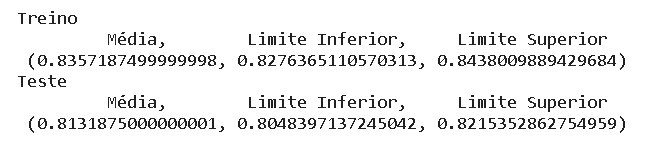

Os resultados comparados indicam que o classificador usando SVM é mais acurado que o classifcador usando MLP. Estes casos possuem duas nuâncias:
* Apesar do SVM ter obtido esses valores através de 30 experimentos, não são usados todos os dados disponíveis (apenas 80% deles aleatoriamente em cada teste);
* O resultado encontrado na letra d) usando MLP não é o resultado ótimo encontrado usando um número maior de ciclos. 

Portanto, iremos comparar os resultados de ambos para os melhores casos encontrados.

Para o SVM:

In [ ]:
print("\nTeste\n")
predictions = svmRBF.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


Teste

[[85 15]
 [16 84]]
              precision    recall  f1-score   support

           1       0.84      0.85      0.85       100
           2       0.85      0.84      0.84       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



Para o MLP :

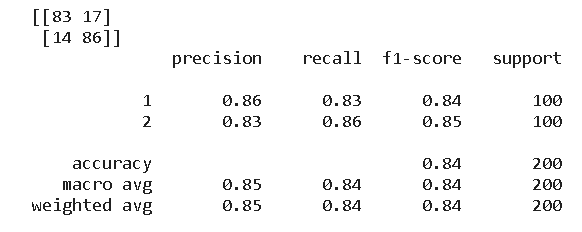

Conclusão: Ambos algoritmos encontraram Acurácias semelhantes em seus melhores casos. Porém o MLP possui flutuações na acurácia caso o modelo seja re-executado. E essas acurácias variam de 80-84%. Como o SVM apresenta constância em seu resultado, é mais vantajoso usá-lo em comparação ao MLP (para este conjunto de dados específico). 